In [6]:
from __future__ import division, print_function
import pandas as pd
import hashlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import integrate
from scipy.special import binom

## Beta sequences

In [2]:
dfby_exp = pd.read_csv("../Datas/sharing/exp_gdna_CDR3_beta_Y.tsv.gz", sep="\t"
                     ,header=None, names=["CDR3", "sequence", "amino", "_", "__", "___"])
dfbx_exp = pd.read_csv("../Datas/sharing/exp_gdna_CDR3_beta_X.tsv.gz", sep="\t"
                     ,header=None, names=["CDR3", "sequence", "amino", "_", "__", "___"])
dfb_gen = pd.read_csv("../Datas/sharing/gen_CDR3_beta_werr_inframe.tsv.gz", sep="\t",
                     header=None, names=["CDR3", "sequence", "amino", "_", "__", "___"])

In [4]:
# keep only productive sequences
for df in [dfby_exp, dfbx_exp, dfb_gen]:
    df["isinframe"] = df.sequence.apply(lambda x:len(str(x))%3 == 0)
    df["stopcodon"] = df.amino.apply(lambda x: ('*' in str(x)))

dfby_exp_prod = dfby_exp[dfby_exp.isinframe & ~dfby_exp.stopcodon].copy()
dfbx_exp_prod = dfbx_exp[dfbx_exp.isinframe & ~dfbx_exp.stopcodon].copy()
dfb_gen_prod = dfb_gen[dfb_gen.isinframe & ~dfb_gen.stopcodon].copy()

# hash function definition
dfb_gen_prod["hash"] = dfb_gen_prod.amino.apply(
    lambda x: 
    int(hashlib.md5(str(x).encode('utf-8')).hexdigest()[:12],16)/int("F"*12,16))

# remove sequences duplicates (no way of distinguishing those from identical reads)
dfb_gen_prod = dfb_gen_prod.drop_duplicates(subset=["sequence"])
dfbx_exp_prod = dfbx_exp_prod.drop_duplicates(subset=["sequence"])
dfby_exp_prod = dfby_exp_prod.drop_duplicates(subset=["sequence"])

In [5]:
qb = 0.037
dfb_gen_selected = dfb_gen_prod[dfb_gen_prod.hash <= qb]

In [6]:
nb_mean = 5
samples_b = range(1000, len(dfb_gen_selected), len(dfb_gen_selected)//50) 
res_gen_b = []
for n in samples_b:
    res_gen_b.append(np.mean([len(np.unique(dfb_gen_selected.sample(n).amino.values)) for _ in range(nb_mean)]))

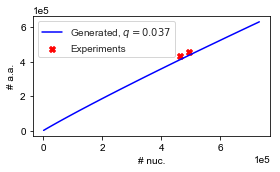

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4.,2.5))
sns.set_style("white")
ax.plot(samples_b, res_gen_b, color='blue', label="Generated, $q=0.037$")
#plt.title("Simulation of the number of unique amino-acid for a sample of size N")
ax.scatter([len(dfbx_exp_prod), len(dfby_exp_prod)],
         [len(np.unique(dfbx_exp_prod.amino)), len(np.unique(dfby_exp_prod.amino))],
         color='red',marker='X', label="Experiments")
ax.legend()
plt.xlabel("# nuc.")
plt.ylabel("# a.a.")
ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.tight_layout()
plt.savefig("aa_vs_nuc_beta.pdf")
plt.show()

## Alpha sequences

In [2]:
dfax_exp = pd.read_csv("../Datas/sharing/exp_gdna_CDR3_alpha_X.tsv.gz", sep="\t"
                     ,header=None, names=["CDR3", "sequence", "amino", "_", "__", "___"])
dfay_exp = pd.read_csv("../Datas/sharing/exp_gdna_CDR3_alpha_Y.tsv.gz", sep="\t"
                     ,header=None, names=["CDR3", "sequence", "amino", "_", "__", "___"])
dfa_gen = pd.read_csv("../Datas/sharing/gen_CDR3_alpha_werr_inframe.tsv.gz", sep="\t",
                     header=None, names=["CDR3", "sequence", "amino", "_", "__", "___"])


dfax_exp = dfax_exp.dropna(subset = ['amino']).copy()
dfay_exp = dfay_exp.dropna(subset = ['amino']).copy()
dfa_gen = dfa_gen.dropna(subset = ['amino']).copy()

In [3]:
# keep only productive sequences
for df in [dfax_exp, dfay_exp, dfa_gen]:
    df["isinframe"] = df.sequence.apply(lambda x:len(str(x))%3 == 0)
    df["stopcodon"] = df.amino.apply(lambda x: ('*' in str(x)))
dfax_exp_prod = dfax_exp[dfax_exp.isinframe & ~dfax_exp.stopcodon].copy()
dfay_exp_prod = dfay_exp[dfay_exp.isinframe & ~dfay_exp.stopcodon].copy()
dfa_gen_prod = dfa_gen[dfa_gen.isinframe & ~dfa_gen.stopcodon].copy()

# hash function definition
dfa_gen_prod["hash"] = dfa_gen_prod.amino.apply(
    lambda x: 
    int(hashlib.md5(str(x).encode('utf-8')).hexdigest()[:12],16)/int("F"*12,16))

# remove sequences duplicates (no way of distinguishing those from identical reads)
dfa_gen_prod = dfa_gen_prod.drop_duplicates(subset=["sequence"])
dfax_exp_prod = dfax_exp_prod.drop_duplicates(subset=["sequence"])
dfay_exp_prod = dfay_exp_prod.drop_duplicates(subset=["sequence"])

In [4]:
qa = 0.16
dfa_gen_selected = dfa_gen_prod[dfa_gen_prod.hash <= qa]

In [5]:
nb_mean = 5
samples_a = range(1000, len(dfa_gen_selected), len(dfa_gen_selected)//10) 
res_gen_a = []
for n in samples_a:
    res_gen_a.append(np.mean([len(np.unique(dfa_gen_selected.sample(n).amino.values)) for _ in range(nb_mean)]))

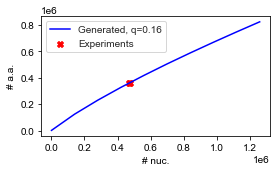

In [6]:
fig, ax = plt.subplots(1,1,figsize=(4,2.5))
ax.plot(samples_a, res_gen_a, color='blue', label="Generated, q=0.16")
sns.set_style("white")
#ax.set_title("Simulation of the number of unique amino-acid for a sample of size N")
ax.scatter([len(dfax_exp_prod),len(dfay_exp_prod)],
         [len(np.unique(dfax_exp_prod.amino)),len(np.unique(dfay_exp_prod.amino))],
          color='red',marker='X', label="Experiments")
ax.legend()
ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel("# nuc.")
plt.ylabel("# a.a.")
plt.tight_layout()
plt.savefig("aa_vs_nuc_alpha.pdf")
plt.show()

## Nucleotide sharing estimation

We compute then interpolate over generated distributions of the generation's probabilities of $\alpha-\beta$ (with both chains supposed independant). 

This is based on the paper www.arxiv.org/pdf/1803.01056.pdf (see methods)

Then we can compute the number $M_k(\{N_i\}_{i \in 1 \cdots k})$ of shared nucleotide between $k$ individuals, with sample sizes $\{N_i\}_{i \in 1 .. k}$, the generating function of those numbers can be approximated by: 
$$
G(x, \{N_i\}) = \sum_{n=0}^k M_{n}(\{N_i\}) x^{n} \approx \int_{0}^{\infty} dE\  p(E)\  e^E  \prod_{i=1}^k \left[ e^{-N_i e^{-E}} + (1 - e^{-N_i e^{-E}})x\right]
$$

In [7]:
# extract generated nucleotides and associated pgen, for alpha and beta
df_pgen_beta = pd.read_csv("../Datas/sharing/Pgen_counts_beta.csv.gz", sep=";")
df_pgen_alpha = pd.read_csv("../Datas/sharing/Pgen_counts_alpha.csv.gz", sep=";")
pgen_b = df_pgen_beta.Pgen_estimate.values
pgen_b = pgen_b[~np.isnan(pgen_b)]
pgen_a = df_pgen_alpha.Pgen_estimate.values
pgen_a = pgen_a[~np.isnan(pgen_a)]
pgen_ab = np.multiply(df_pgen_beta.Pgen_estimate.values, df_pgen_alpha.Pgen_estimate.values)
pgen_ab = pgen_ab[~np.isnan(pgen_ab)]

In [8]:
def p_gen_distribution(pgen):
    sns.distplot(-np.log(pgen), label="Raw data")
    plt.title("Distribution of the Shannon surprise of the sequences")
    plt.xlabel("Shannon surprise")

    Es = -np.log(pgen)
    dE = 1
    bins=np.arange(dE/2, np.max(Es)+dE/2, dE) 
    hist, _ = np.histogram(Es, bins=np.arange(0, np.max(Es)+dE, dE), density=True)
    p = interp1d(bins, hist, fill_value=0., bounds_error=False)
    plt.plot(bins, p(bins),label="Interpolation")
    plt.legend()
    plt.show()
    return p

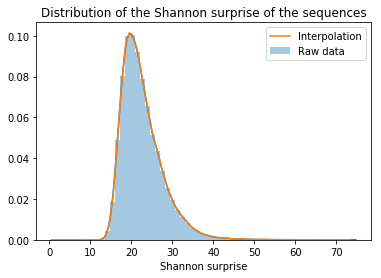

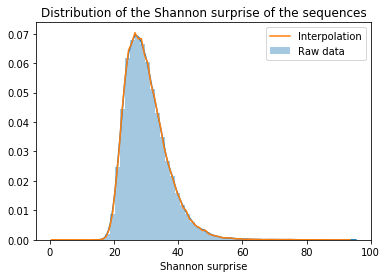

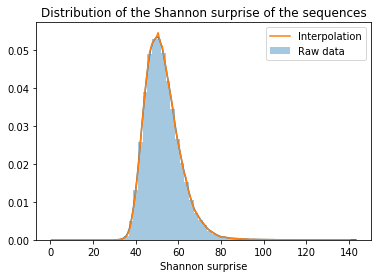

In [9]:
pa = p_gen_distribution(pgen_a)
pb = p_gen_distribution(pgen_b)
pab = p_gen_distribution(pgen_ab)

Compute  $M_0(N)$ and $M_m(\{N\}_{i \in 1 \cdots k})$ (beware : for nucleotides)

In [10]:
def M0(N, p, qfs):
    return integrate.quad(lambda E: p(E-np.log(qfs))*np.exp(E)*(1-np.exp(-N*np.exp(-E))), 0, 100)[0]

def M(m, N, k, p, qfs):
    return integrate.quad(lambda E: integrandM(E, m, N, k, p, qfs), 0, 100)[0]

def integrandM(E, m, N, k, p, qfs):
    return p(E-np.log(qfs))*np.exp(E)*binom(k,m)*np.exp(-N*np.exp(-E)*(k-m))*(1-np.exp(-N*np.exp(-E)))**(m)
import warnings; warnings.simplefilter('ignore') #integrate.quad return a warning, due to the fast variation of the function for large values of E, this does not affect the result
  

In [11]:
N = 1e5
qfb = 0.037*0.26/32
qfa = 0.16*0.26
print(1-M0(N, pb, qfb)/N)
print(1-M0(N, pa, qfa)/N)

0.018146966172897128
0.016861151203432678


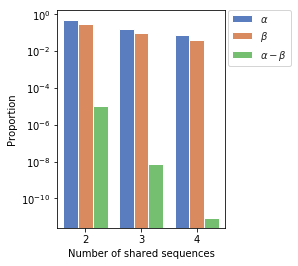

In [12]:
fig, ax = plt.subplots(1,1,figsize=(3,4))
N = 1e6
df = pd.DataFrame(columns=["nb_shared", "proportion","type"])
df["type"] = [r"$\alpha$"]*3+[r"$\beta$"]*3+[r"$\alpha-\beta$"]*3
df["nb_shared"] = list(range(2,5))*3
df["proportion"] = ([M(n, N, 10, pa, qfa)/N for n in range(2,5)] +
                    [M(n, N, 10, pb, qfb)/N for n in range(2,5)] +
                    [M(n, N, 10, pab, qfb * qfa)/N for n in range(2,5)])
sns.set_palette(sns.color_palette("muted"))
sns.set_style("white")
g = sns.barplot(x="nb_shared", y="proportion", hue="type", data=df)
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_ylabel('Proportion')
g.set_xlabel('Number of shared sequences')
g.set_yscale('log')
plt.savefig("number_shared_sequences.pdf")
plt.show()

In [34]:
# Comparaison with the paper of Grigaityte -- Jiang
N = 40000
print(sum((M(k, N, 5, pab, qfb*qfa) for k in range(2,6))))
print(sum((M(k, N, 5, pab, qfb*qfa/10000) for k in range(2,6))))

0.0036601234593729728
28.83929512936497


In [46]:
print(M(10**10, 10**11, 10**10, pab, qfb*qfa))

397465.32950151426


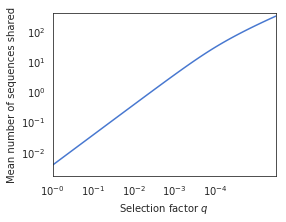

In [14]:
# Comparaison with the paper of Grigaityte -- Jiang
N = 40000
nb_sharing = [np.log10(sum((M(k, N, 5, pab, qfb*qfa*10**(-q))) for k in range(2,6))) for q in np.arange(0., 5.6,0.1)]
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(np.arange(0.,5.6,0.1), nb_sharing)

ax.set_xticks(range(0,5))
ax.set_xticklabels(["$10^{-%s}$" % i for i in range(0,6)])
ax.set_xlim(0,5.5)

ax.set_yticks(range(-3,3))
ax.set_yticklabels(["$10^{%s}$" % i for i in range(-3,3)])
ax.set_ylim(-2.8,2.6)

ax.set_xlabel("Selection factor $q$")
ax.set_ylabel("Mean number of sequences shared")

plt.savefig("selection_variation.pdf")
plt.show()

## Alpha-Beta sequences

In [61]:
dfax_exp = pd.read_csv("../Datas/sharing/exp_gdna_CDR3_alpha_X.tsv.gz", sep="\t"
                     ,header=None, names=["CDR3", "sequence", "amino", "", "", ""])
dfay_exp = pd.read_csv("../Datas/sharing/exp_gdna_CDR3_alpha_Y.tsv.gz", sep="\t"
                     ,header=None, names=["CDR3", "sequence", "amino", "", "", ""])
dfa_gen = pd.read_csv("../Datas/sharing/gen_CDR3_alpha_werr_inframe.tsv.gz", sep="\t",
                     header=None, names=["CDR3", "sequence", "amino", "", "", ""])

In [63]:
# keep only productive sequences
for df in [dfax_exp, dfay_exp, dfa_gen]:
    df["isinframe"] = df.sequence.apply(lambda x:len(str(x))%3 == 0)
    df["stopcodon"] = df.amino.apply(lambda x: ('*' in str(x)))
dfax_exp_prod = dfax_exp[dfax_exp.isinframe & ~dfax_exp.stopcodon].copy()
dfay_exp_prod = dfay_exp[dfay_exp.isinframe & ~dfay_exp.stopcodon].copy()
dfa_gen_prod = dfa_gen[dfa_gen.isinframe & ~dfa_gen.stopcodon].copy()

# hash function definition
dfa_gen_prod["hash"] = dfa_gen_prod.amino.apply(
    lambda x: 
    int(hashlib.md5(str(x).encode('utf-8')).hexdigest()[:12],16)/int("F"*12,16))

# remove sequences duplicates (no way of distinguishing those from identical reads)
dfa_gen_prod = dfa_gen_prod.drop_duplicates(subset=["sequence"])
dfax_exp_prod = dfax_exp_prod.drop_duplicates(subset=["sequence"])
dfay_exp_prod = dfay_exp_prod.drop_duplicates(subset=["sequence"])

In [64]:
qa = 0.16
dfa_gen_selected = dfa_gen_prod[dfa_gen_prod.hash <= qa]

In [65]:
nb_mean = 5
samples_a = range(1000, len(dfa_gen_selected), len(dfa_gen_selected)//10) 
res_gen_a = []
for n in samples_a:
    res_gen_a.append(np.mean([len(np.unique(dfa_gen_selected.sample(n).amino.values)) for _ in range(nb_mean)]))

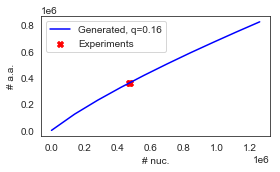

In [67]:
fig, ax = plt.subplots(1,1,figsize=(4,2.5))
ax.plot(samples_a, res_gen_a, color='blue', label="Generated, q=0.16")
sns.set_style("white")
#ax.set_title("Simulation of the number of unique amino-acid for a sample of size N")
ax.scatter([len(dfax_exp_prod),len(dfay_exp_prod)],
         [len(np.unique(dfax_exp_prod.amino.dropna())),len(np.unique(dfay_exp_prod.amino.dropna()))],
          color='red',marker='X', label="Experiments")
ax.legend()
ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel("# nuc.")
plt.ylabel("# a.a.")
plt.tight_layout()
plt.savefig("aa_vs_nuc_alpha.pdf")
plt.show()